In [1]:
# Project: Salaries for San Francisco Employee - Finance Analyst Project
# Machine Learning Project: Google Play Store Analysis using Salary Dataset

# Objective:
# The project aims to analyze employee compensation data, including BasePay,
# OvertimePay, OtherPay, Benefits, and their relation to TotalPay and TotalPayBenefits.
# This is achieved through Exploratory Data Analysis (EDA) and Visualization using Python.

# Dataset Overview:
# Columns in the dataset:
# ● EmployeeName: Name of the employee.
# ● JobTitle: Title of the job.
# ● BasePay: Base salary pay.
# ● OvertimePay: Pay for overtime work.
# ● OtherPay: Any other types of compensation.
# ● Benefits: Benefits provided to the employee.
# ● TotalPay: The total pay without benefits.
# ● TotalPayBenefits: Total pay with benefits included.
# ● Year: The year of the payroll record.

In [2]:
# Step 1: Importing Required Libraries
# First, let's import the necessary libraries like Pandas, NumPy, Matplotlib, and

# Seaborn for data analysis and visualization.

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# For display settings
pd.set_option('display.max_columns', None)

In [4]:
# Load the dataset
df=pd.read_csv("Total.csv")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5000\3898920252.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Total.csv")


In [5]:
# Display the first few rows
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [6]:
print('This Dataset countains {} Rows and {} Columns'.format(df.shape[0], df.shape[1]))

This Dataset countains 312882 Rows and 9 Columns


In [7]:
df.shape

(312882, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [9]:
series_list=['BasePay','OvertimePay','OtherPay','Benefits']
for series in series_list:
    df[series]=pd.to_numeric(df[series],errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [11]:
# Step 2: Data Cleaning
# In this step, we will clean the dataset by handling missing values, converting data types, and performing basic data exploration.
# 1. Checking for Missing Values:

# Check for missing values
print(df.isnull().sum())

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64


In [12]:
# Dropping rows with missing values in key columns (if necessary)
df = df.dropna(subset=['BasePay', 'TotalPayBenefits'])

In [13]:
# 2. Convert Data Types (if necessary):

# Converting columns to appropriate data types if needed
df['Year'] = df['Year'].astype(int)

# Verifying data types
print(df.dtypes)


EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object


In [14]:
# 3. Handling Negative or Zero Pay Values:

# Filter out rows where TotalPay or TotalPayBenefits are 0 or negative
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

# Check updated dataset
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,311856.000000,311856.000000,311856.000000,275700.000000,311856.000000,311856.000000,311856.000000
mean,69902.276001,5687.551424,3463.518703,25088.008789,79053.346128,101232.698211,2014.626898
std,45335.047492,12762.437264,7370.560777,15068.152337,53134.225168,66378.379538,2.292437
min,-166.010000,-292.800000,-7058.590000,-13939.420000,0.010000,0.010000,2011.000000
25%,36011.800000,0.000000,0.000000,13032.060000,39553.912500,49779.165000,2013.000000
50%,67770.010000,0.000000,734.450000,28367.965000,75077.930000,100242.530000,2015.000000
75%,99407.995000,5260.092500,3964.447500,35296.790000,111582.200000,142568.860000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [15]:
# Step 3: Exploratory Data Analysis (EDA)
# 3.1 Descriptive Statistics
# Let's explore summary statistics of the dataset:
# Summary statistics

In [16]:
df['BasePay'].mean()

np.float64(69902.27600123132)

In [17]:
df['BasePay'].max()

np.float64(592394.34)

In [18]:
df['BasePay'].describe()

count    311856.000000
mean      69902.276001
std       45335.047492
min        -166.010000
25%       36011.800000
50%       67770.010000
75%       99407.995000
max      592394.340000
Name: BasePay, dtype: float64

In [19]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,311856.000000,311856.000000,311856.000000,275700.000000,311856.000000,311856.000000,311856.000000
mean,69902.276001,5687.551424,3463.518703,25088.008789,79053.346128,101232.698211,2014.626898
std,45335.047492,12762.437264,7370.560777,15068.152337,53134.225168,66378.379538,2.292437
min,-166.010000,-292.800000,-7058.590000,-13939.420000,0.010000,0.010000,2011.000000
25%,36011.800000,0.000000,0.000000,13032.060000,39553.912500,49779.165000,2013.000000
50%,67770.010000,0.000000,734.450000,28367.965000,75077.930000,100242.530000,2015.000000
75%,99407.995000,5260.092500,3964.447500,35296.790000,111582.200000,142568.860000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [20]:
df[df['BasePay']<0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
72832,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012
72865,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012
72872,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012
72874,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012
72878,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012
72884,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012
72888,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012
72894,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012
72908,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012
72920,Charles Williams,Junior Clerk,-30.58,45.87,0.0,1.36,15.29,16.65,2012


C:\Users\ACER\AppData\Local\Temp\ipykernel_5000\2806709777.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index,


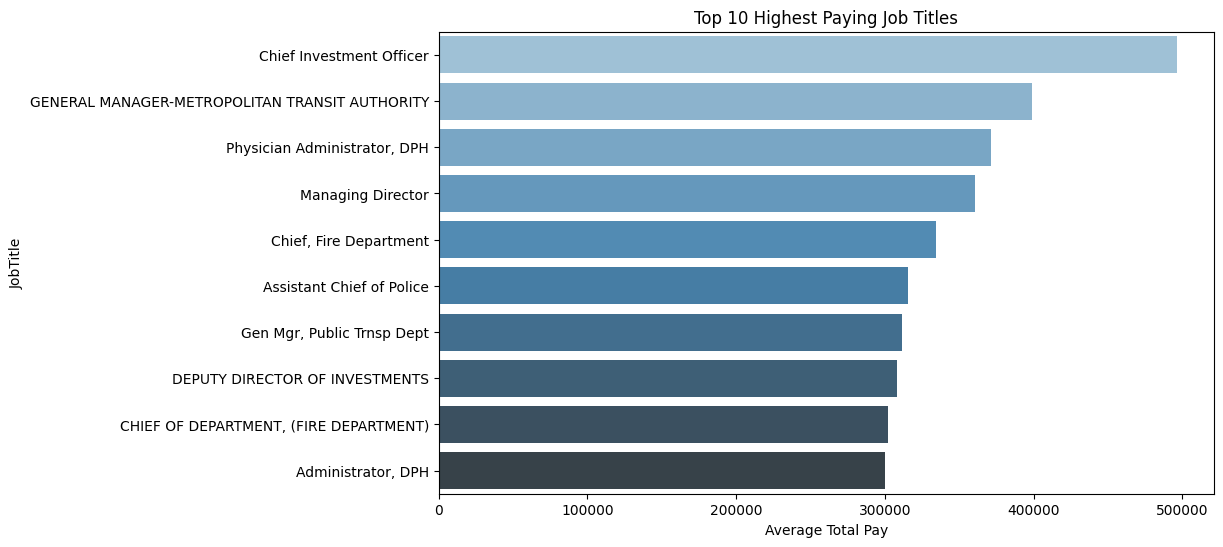

In [21]:
# 3.2 Top 10 Highest Paying Job Titles
# Group by job title and get the mean TotalPay
job_salary = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index,
palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

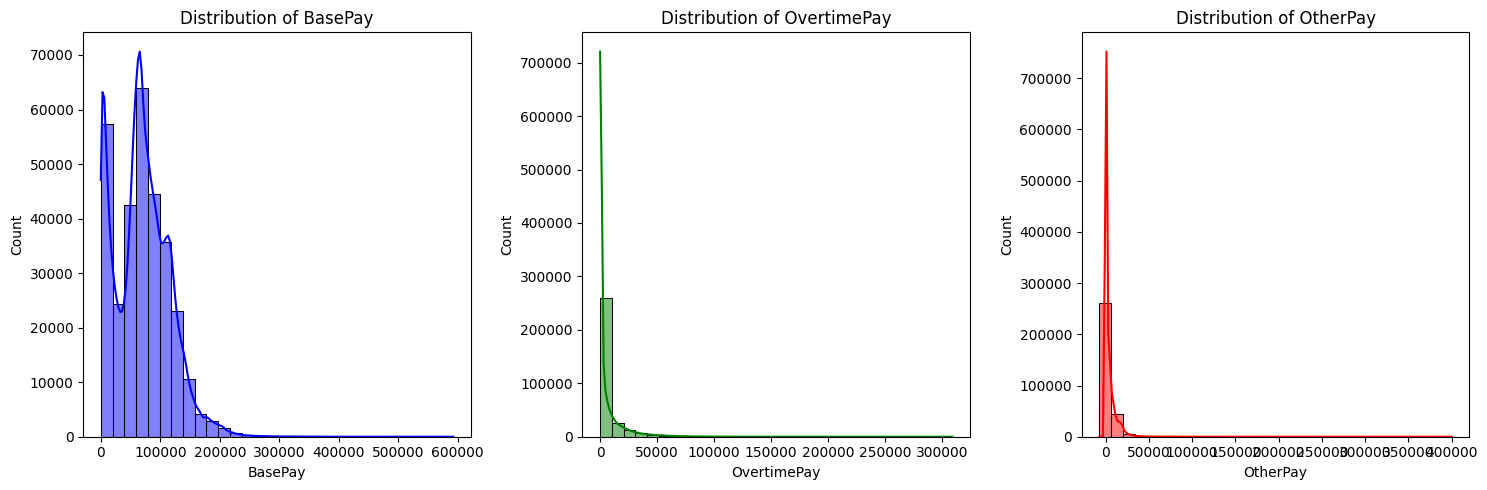

In [22]:
# 3.3 Distribution of BasePay, OvertimePay, and OtherPay

# Plot histograms for BasePay, OvertimePay, and OtherPay
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')

plt.subplot(1,3,2)
sns.histplot(df['OvertimePay'], bins=30, kde=True,
color='green')
plt.title('Distribution of OvertimePay')

plt.subplot(1,3,3)
sns.histplot(df['OtherPay'], bins=30, kde=True, color='red')
plt.title('Distribution of OtherPay')

plt.tight_layout()
plt.show()

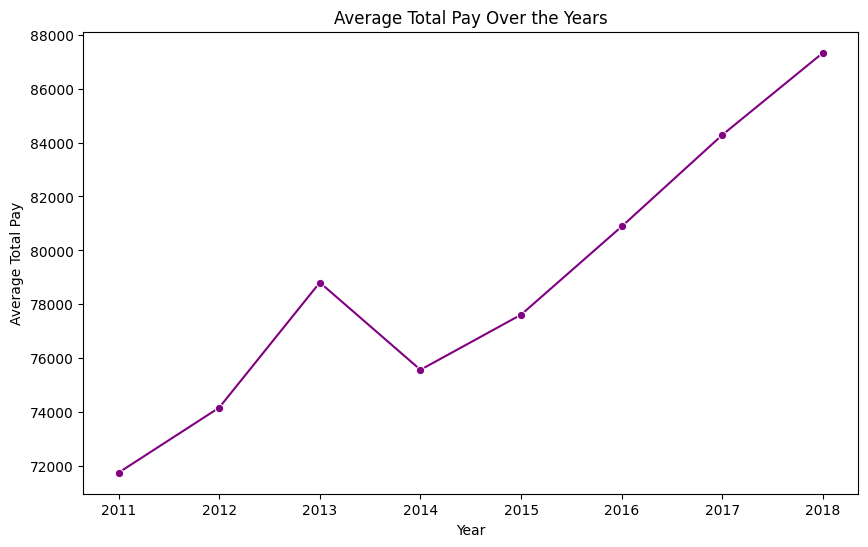

In [23]:
# 3.4 Pay Over the Years

# Group by Year and calculate mean total pay
pay_over_years = df.groupby('Year')['TotalPay'].mean()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values,
marker='o', color='purple')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

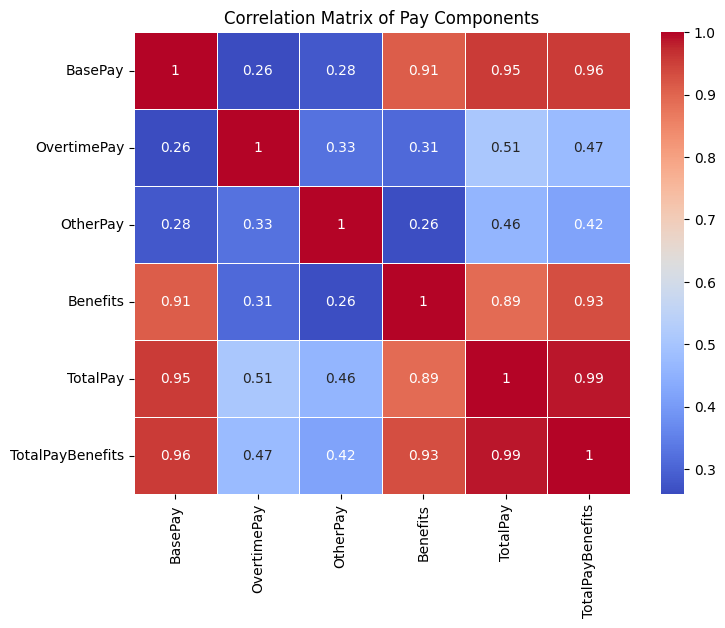

In [24]:
# 3.5 Correlation Heatmap

# Correlation matrix
plt.figure(figsize=(8,6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay',
'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()


In [25]:
# Step 4: Salary Prediction with Machine Learning

# 4.1 Data Preprocessing
# Before training a machine learning model, we will preprocess the dataset by handling categorical features and splitting the data into training and test sets.
# 1. Handling Categorical Variables:

# Import necessary libraries
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Encoding JobTitle using one-hot encoding
if 'JobTitle' in df.columns:
    df = pd.get_dummies(df, columns=['JobTitle'], drop_first=True)
    print("Columns after encoding:", df.columns)
else:
    print("JobTitle column not found. It may have been removed or already encoded.")

# Display new dataframe
df.head()

Columns after encoding: Index(['EmployeeName', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
       'TotalPay', 'TotalPayBenefits', 'Year', 'JobTitle_ACCOUNTANT',
       'JobTitle_ACCOUNTANT INTERN',
       ...
       'JobTitle_Wire Rope Cable Maint Mechanic',
       'JobTitle_Wire Rope Cable Maint Sprv',
       'JobTitle_WireRopeCable Maint Mech Train',
       'JobTitle_Worker's Comp Supervisor 1',
       'JobTitle_Worker's Compensation Adjuster',
       'JobTitle_X-RAY LABORATORY AIDE', 'JobTitle_X-Ray Laboratory Aide',
       'JobTitle_YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS',
       'JobTitle_Youth Comm Advisor', 'JobTitle_ZOO CURATOR'],
      dtype='object', length=2288)


EmployeeName    BasePay  OvertimePay   OtherPay  Benefits   TotalPay  \
0     NATHANIEL FORD  167411.18         0.00  400184.25       NaN  567595.43   
1       GARY JIMENEZ  155966.02    245131.88  137811.38       NaN  538909.28   
2     ALBERT PARDINI  212739.13    106088.18   16452.60       NaN  335279.91   
3  CHRISTOPHER CHONG   77916.00     56120.71  198306.90       NaN  332343.61   
4    PATRICK GARDNER  134401.60      9737.00  182234.59       NaN  326373.19   

   TotalPayBenefits  Year  JobTitle_ACCOUNTANT  JobTitle_ACCOUNTANT INTERN  \
0         567595.43  2011                False                       False   
1         538909.28  2011                False                       False   
2         335279.91  2011                False                       False   
3         332343.61  2011                False                       False   
4         326373.19  2011                False                       False   

   JobTitle_ACPO,JuvP, Juv Prob (SFERS)  JobTitle_ACUPUNCTURIST  \
0                                 False                   False   
1                                 False                   False   
2                                 False                   False   
3                                 False                   False   
4                                 False                   False   

   JobTitle_ADMINISTRATIVE ANALYST  JobTitle_ADMINISTRATIVE ANALYST II  \
0                            False                               False   
1                            False                               False   
2                            False                               False   
3                            False                               False   
4                            False                               False   

   JobTitle_ADMINISTRATIVE ANALYST III  JobTitle_ADMINISTRATIVE ENGINEER  \
0                                False                             False   
1                                False                             False   
2                                False                             False   
3                                False                             False   
4                                False                             False   

   JobTitle_ADMINISTRATIVE SERVICES MANAGER  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   JobTitle_ADMINISTRATOR, SFGH MEDICAL CENTER  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   JobTitle_AFFIRMATIVE ACTION SPECIALIST  JobTitle_AGRICULTURAL INSPECTOR  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                            False   

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS  \
0                                              False        
1                                              False        
2                                              False        
3                                              False       

In [26]:
print(df.columns.tolist())

['EmployeeName', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'JobTitle_ACCOUNTANT', 'JobTitle_ACCOUNTANT INTERN', 'JobTitle_ACPO,JuvP, Juv Prob (SFERS)', 'JobTitle_ACUPUNCTURIST', 'JobTitle_ADMINISTRATIVE ANALYST', 'JobTitle_ADMINISTRATIVE ANALYST II', 'JobTitle_ADMINISTRATIVE ANALYST III', 'JobTitle_ADMINISTRATIVE ENGINEER', 'JobTitle_ADMINISTRATIVE SERVICES MANAGER', 'JobTitle_ADMINISTRATOR, SFGH MEDICAL CENTER', 'JobTitle_AFFIRMATIVE ACTION SPECIALIST', 'JobTitle_AGRICULTURAL INSPECTOR', 'JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI', 'JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS', 'JobTitle_AIRPORT COMMUNICATIONS OPERATOR', 'JobTitle_AIRPORT COMMUNICATIONS SUPERVISOR', 'JobTitle_AIRPORT ECONOMIC PLANNER', 'JobTitle_AIRPORT ELECTRICIAN', 'JobTitle_AIRPORT ELECTRICIAN SUPERVISOR', 'JobTitle_AIRPORT EMERGENCY PLANNING COORDINATOR', 'JobTitle_AIRPORT MECHANICAL MAINTENANCE SUPERVISOR', 'JobTitle_AIRPORT NOISE ABATEM

In [27]:
# 2. Splitting the Data:

import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Normalize column names: lowercase, no spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '')

# Identify target and employee columns
target_col = 'totalpaybenefits'
employee_col = 'employeename'

# Find job-related column (containing 'job')
job_cols = [col for col in df.columns if 'job' in col]
if not job_cols:
    raise KeyError("No job-related column found in DataFrame")
job_col = job_cols[0]

# Convert job column to string and clean text (handle missing)
df[job_col] = df[job_col].fillna('missing').astype(str).str.lower().str.strip()

# Group rare job titles (less than 10 occurrences)
job_counts = df[job_col].value_counts()
rare_jobs = job_counts[job_counts < 10].index
df[job_col] = df[job_col].replace(rare_jobs, 'other')

# Target encode job titles
encoder = ce.TargetEncoder(cols=[job_col])
df[job_col] = encoder.fit_transform(df[job_col], df[target_col])

# Prepare features and target, drop employee name and target columns safely
X = df.drop(columns=[employee_col, target_col], errors='ignore')
y = df[target_col]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [28]:
# 4.2 Model Training
# We'll use a Linear Regression model for predicting employee salary based on features such as BasePay, OvertimePay, JobTitle, etc.

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("Total.csv")

# Step 1: Standardize column names
df.columns = df.columns.str.lower().str.strip()
print("Available columns in the dataset:")
print(df.columns.tolist())

# Step 2: Fix 'jobtitle' column if it exists under a different name
possible_jobtitle_names = ['job title', 'jobtitle', 'job_title', 'jobtitle ']
for name in possible_jobtitle_names:
    if name in df.columns:
        df.rename(columns={name: 'jobtitle'}, inplace=True)
        print(f"Renamed column '{name}' to 'jobtitle'")
        break

# Step 3: Required columns
required_cols = ['basepay', 'overtimepay', 'jobtitle', 'totalpaybenefits']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Keep only required columns
df = df[required_cols].copy()

# Convert numeric columns
df['basepay'] = pd.to_numeric(df['basepay'], errors='coerce')
df['overtimepay'] = pd.to_numeric(df['overtimepay'], errors='coerce')
df['totalpaybenefits'] = pd.to_numeric(df['totalpaybenefits'], errors='coerce')

# Handle rare job titles
job_counts = df['jobtitle'].value_counts()
common_jobs = job_counts[job_counts > 50].index
df['jobtitle'] = df['jobtitle'].where(df['jobtitle'].isin(common_jobs), 'Other')

# One-hot encode jobtitle
# Step 1: Normalize and count job titles
job_counts = df['jobtitle'].value_counts()

# Step 2: Keep top N job titles, group the rest as 'Other'
TOP_N = 50  # You can reduce this to 20 or 10 if still large
common_jobs = job_counts.nlargest(TOP_N).index
df['jobtitle'] = df['jobtitle'].where(df['jobtitle'].isin(common_jobs), 'Other')

# Step 3: One-hot encode with reduced cardinality
df = pd.get_dummies(df, columns=['jobtitle'], drop_first=True)

# Drop rows with missing target
df = df.dropna(subset=['totalpaybenefits'])

# Features and target
X = df.drop('totalpaybenefits', axis=1)
y = df['totalpaybenefits']

# Impute missing values in features
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

C:\Users\ACER\AppData\Local\Temp\ipykernel_5000\1503602608.py:11: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Total.csv")


Available columns in the dataset:
['employeename', 'jobtitle', 'basepay', 'overtimepay', 'otherpay', 'benefits', 'totalpay', 'totalpaybenefits', 'year']
Renamed column 'jobtitle' to 'jobtitle'
Mean Squared Error: 132031299.82


In [29]:
# 4.3 Model Evaluation
# Evaluate the model using Mean Absolute Error (MAE) and R-squared score.

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Absolute Error: 7069.632642977284
R-squared Score: 0.9700785280827645


In [30]:
df.head()

,basepay,overtimepay,totalpaybenefits,jobtitle_Attorney (Civil/Criminal),jobtitle_Clerk,jobtitle_Community Police Services Aide,jobtitle_Custodian,jobtitle_Deputy Sheriff,jobtitle_EMT/Paramedic/Firefighter,jobtitle_Electrical Transit System Mech,jobtitle_Firefighter,jobtitle_Food Service Worker,jobtitle_Gardener,jobtitle_General Laborer,jobtitle_HSA Sr Eligibility Worker,jobtitle_Health Worker 2,jobtitle_Junior Clerk,jobtitle_Librarian 1,jobtitle_Library Page,jobtitle_Licensed Vocational Nurse,"jobtitle_Lieutenant, Fire Suppression",jobtitle_Medical Evaluations Assistant,jobtitle_Museum Guard,jobtitle_Nurse Practitioner,jobtitle_Other,jobtitle_Parking Control Officer,jobtitle_Patient Care Assistant,jobtitle_Police Officer,jobtitle_Police Officer 2,jobtitle_Police Officer 3,jobtitle_Porter,jobtitle_Pr Administrative Analyst,jobtitle_Protective Services Worker,jobtitle_Publ Svc Aide-Asst to Prof,jobtitle_Public SafetyComm Disp,jobtitle_Public Service Trainee,jobtitle_Public Svc Aide-Public Works,jobtitle_REGISTERED NURSE,jobtitle_Recreation Leader,jobtitle_Registered Nurse,jobtitle_SPECIAL NURSE,jobtitle_School Crossing Guard,jobtitle_Senior Administrative Analyst,jobtitle_Senior Clerk,jobtitle_Senior Clerk Typist,jobtitle_Sergeant 3,jobtitle_Special Nurse,jobtitle_Stationary Engineer,jobtitle_TRANSIT OPERATOR,jobtitle_Transit Operator,jobtitle_Transit Supervisor,jobtitle_Truck Driver
0,167411.18,0.00,567595.43,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,155966.02,245131.88,538909.28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,212739.13,106088.18,335279.91,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,77916.00,56120.71,332343.61,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,134401.60,9737.00,326373.19,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
# Load the dataset
df=pd.read_csv("Total.csv")

df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5000\3474670430.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Total.csv")


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [32]:
# Step5: Elementary EDA
# Exploring some insights about Employee Name: "Ricardo Jimenez"

df_ricardo = df[df['EmployeeName'] == 'Ricardo Jimenez']

In [33]:
# Plot RicardoJimenez BasePay VS Year
print(df_ricardo[['BasePay', 'Year']])

          BasePay  Year
50596    72936.93  2012
120452   89128.98  2014
160317   89623.29  2015
198692   97131.01  2016
240214  100900.50  2017
299079    61286.0  2018


In [34]:
A = df['Year'].nunique()  # if column name is lowercase 'year'
B = df['Year'].unique()
print(f'The information of {A} years are available in the dataset: {B}')

The information of 8 years are available in the dataset: [2011 2012 2013 2014 2015 2016 2017 2018]


In [35]:
print(df['BasePay'].dtype)
print(df['BasePay'].unique()[:10])

object
[167411.18 155966.02 212739.13 77916.0 134401.6 118602.0 92492.01
 256576.96 176932.64 285262.0]


In [36]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')

print(df.groupby('Year')['BasePay'].mean())

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
2015    68776.293324
2016    71181.405996
2017    74570.581134
2018    76947.426822
Name: BasePay, dtype: float64


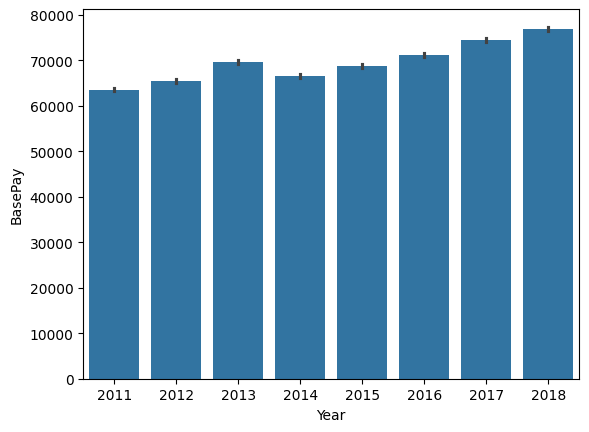

In [37]:
sns.barplot(data=df, x='Year', y='BasePay')
plt.show()

<Axes: xlabel='Year', ylabel='TotalPayBenefits'>

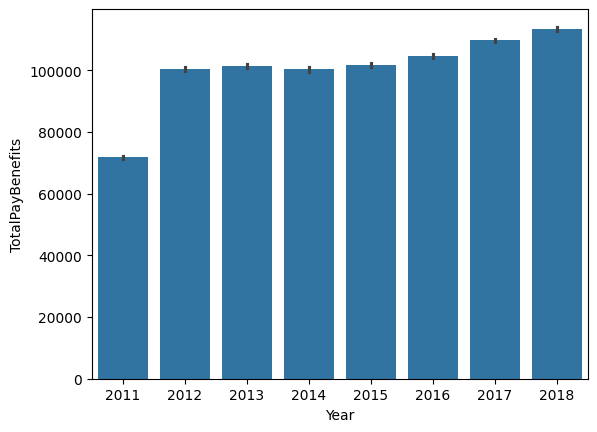

In [38]:
# Exercise2: Plot RicardoJimenez TotalPayBenefits VS Year
df[df['EmployeeName']=='Ricardo Jimenez'][['TotalPayBenefits','Year']]
sns.barplot(data=df, x='Year', y='TotalPayBenefits')

In [39]:
# Ensure column names are correct
print("Columns:", df.columns.tolist())  # Check once to be sure

Columns: ['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']


In [40]:
# Fix 'BasePay' to numeric
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')

In [41]:
# Fix missing or renamed job title column
if 'Job Title' in df.columns:
    df.rename(columns={'Job Title': 'JobTitle'}, inplace=True)

In [42]:
# 1. Which year has the maximum mean BasePay?
mean_basepay_by_year = df.groupby('Year')['BasePay'].mean()
max_mean_value = mean_basepay_by_year.max()
max_mean_year = mean_basepay_by_year.idxmax()
print(f"📅 Year with max mean BasePay: {max_mean_year} (${max_mean_value:.2f})")

📅 Year with max mean BasePay: 2018 ($76947.43)


In [43]:
# Check available columns
print("Available columns:", df.columns.tolist())

# Try renaming if possible
for col in df.columns:
    if 'job' in col.lower() and 'title' in col.lower():
        df.rename(columns={col: 'JobTitle'}, inplace=True)
        break

# Use safely
if 'JobTitle' in df.columns:
    print("\n🔝 Top 5 Most Common Job Titles:")
    print(df['JobTitle'].value_counts().head(5))
else:
    print("⚠️ 'JobTitle' column not found in the DataFrame.")

Available columns: ['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']

🔝 Top 5 Most Common Job Titles:
JobTitle
Transit Operator    17995
Special Nurse       10857
Registered Nurse     9249
Firefighter          5891
Custodian            5759
Name: count, dtype: int64


In [44]:
# 3. Number of unique job titles each year
print("\n📊 Unique Job Titles by Year:")
print(df.groupby('Year')['JobTitle'].nunique())


📊 Unique Job Titles by Year:
Year
2011    1045
2012    1044
2013    1051
2014     996
2015    1010
2016    1009
2017    1017
2018    1000
Name: JobTitle, dtype: int64


In [45]:
# 4. Unique job titles in 2013
unique_2013 = df[df['Year'] == 2013]['JobTitle'].nunique()
print(f"\n🔹 Unique Job Titles in 2013: {unique_2013}")


🔹 Unique Job Titles in 2013: 1051


In [46]:
# 5. Number of job titles in 2013 that were represented only once
one_time_titles_2013 = sum(df[df['Year'] == 2013]['JobTitle'].value_counts() == 1)
print(f"🔸 Job Titles in 2013 that appeared only once: {one_time_titles_2013}")

🔸 Job Titles in 2013 that appeared only once: 202


In [47]:
# 6. Number of job titles that contain the word "chief"
def chief_string(title):
    if isinstance(title, str):
        return 'chief' in title.lower()
    return False

chief_count = sum(df['JobTitle'].apply(chief_string))
print(f"👮 Job Titles containing 'chief': {chief_count}")

👮 Job Titles containing 'chief': 1236
